<a href="https://colab.research.google.com/github/hyejinbeck/Seoul_hotplot/blob/main/K_Means_21%EC%B0%A8_8%EA%B0%9C%EA%B5%AC_%EC%9D%98%EB%A3%8C_%EB%AF%B8%EC%9A%A9%ED%95%9C%ED%95%B4%EC%84%9C_%EC%8B%9C%EA%B0%84%EB%8C%80%EC%99%80%EC%97%B0%EB%A0%B9%EB%8C%80%EB%B9%84%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경설정

In [ ]:
############################################

# OS환경 : Mac OS

############################################ 초기셋팅
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import platform
import matplotlib

import warnings
warnings.filterwarnings('ignore')

# 여기서 Matplotlib 코드를 사용하여 그래프 생성 및 표시
%matplotlib inline
from google.colab import files
from google.colab import drive

In [ ]:
# 한글폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# plt.rc('font', family='NanumGothic')
# plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
# plt.rc('font', family='AppleGothic') #맥
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False  # 부호

Text(0.5, 0, '시간(분)')

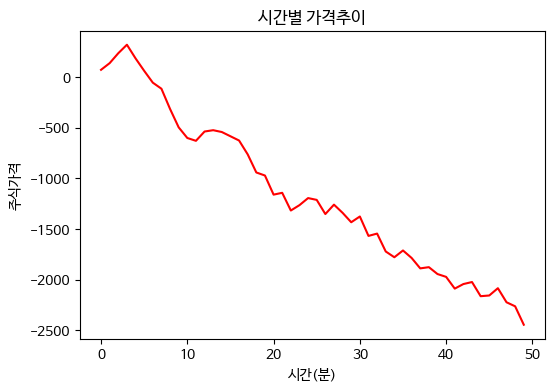

In [ ]:
#################### 한글폰트 깨지는지 확인
test_data = np.random.randint(-200, 100, 50).cumsum()
plt.figure(figsize=(6,4))
plt.plot(range(50), test_data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분)')

#################### 그래도 에러나면 Runtime > Restart runtime 꼭 누르기!

In [ ]:
############################################ 불러오기
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

############################################ 원본 데이터
# df_real = pd.read_csv('/content/drive/MyDrive/2조_프로젝트/서울시 상권분석서비스(상권-추정매출).csv', encoding='euc_kr')

# df = pd.read_csv('/content/drive/MyDrive/2조_프로젝트/output5.csv', encoding='utf-8')
df = pd.read_csv('/content/drive/MyDrive/2조_프로젝트/output5.csv', encoding='euc_kr')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(163542, 82)

In [ ]:
df['서비스_업종_코드_명'].unique()

array(['한식음식점', '일식음식점', '섬유제품', '화초', '애완동물', '가구', '철물점', '조명용품', '제과점',
       '문구', '의약품', '반찬가게', '편의점', '노래방', '미용실', '당구장', '예술학원', '일반교습학원',
       '운동/경기용품', '패스트푸드점', '분식전문점', '호프-간이주점', '육류판매', '핸드폰',
       '컴퓨터및주변장치판매', '슈퍼마켓', '여관', '세탁소', '피부관리실', '네일숍', '자동차미용',
       '자동차수리', '스포츠클럽', '한의원', '치과의원', '일반의원', '스포츠 강습', '커피-음료', '일반의류',
       '치킨전문점', '전자상거래업', '중식음식점', '양식음식점', '골프연습장', 'PC방', '인테리어',
       '시계및귀금속', '미곡판매', '외국어학원', '신발', '가전제품수리', '화장품', '안경', '의료기기',
       '완구', '자전거 및 기타운송장비', '서적', '부동산중개업', '청과상', '수산물판매', '고시원',
       '가전제품', '가방'], dtype=object)

[블로그참고](https://velog.io/@nayoung5859/K-means-clustering%EC%9C%BC%EB%A1%9C-%EB%B2%88%ED%99%94%EA%B0%80-%EC%83%81%EA%B6%8C-%EC%B0%BE%EC%95%84%EB%B3%B4%EA%B8%B0)

# 전처리

In [ ]:
df.shape

(163542, 82)

In [ ]:
# 행정동,자치구 컬럼에 있는 "띄어쓰기" 없애기
df['행정동'] = df['행정동'].str.replace(' ', '')
df['자치구'] = df['자치구'].str.replace(' ', '')
df['서비스_업종_코드_명'] = df['서비스_업종_코드_명'].str.replace(' ', '')

In [ ]:
df = df[df['자치구']=='강남구']
df.shape

(11147, 82)

In [ ]:
###### 업종별로 4그룹 나누기
df_test = df[df['서비스_업종_코드_명'].isin(['치과의원', '일반의원', '한의원', '피부관리실', '네일숍', '미용실'])]
# df_test = df[df['서비스_업종_코드_명'].isin(['분식전문점', '패스트푸드점', '양식음식점', '일식음식점', '중식음식점', '한식음식점', '치킨전문점', '호프-간이주점','커피-음료', '제과점'])]
# df_test = df[df['서비스_업종_코드_명'].isin(['외국어학원', '일반교습학원', '예술학원'])]
# df_test = df[df['서비스_업종_코드_명'].isin(['스포츠클럽', '스포츠강습', '골프연습장', '당구장', 'PC방','노래방'])]

In [ ]:
# print(df_a.shape)  # 의료/뷰티      (22249, 82)
# print(df_b.shape)  # 식사/카페      (43078, 82)
# print(df_c.shape)  # 학원/교육      (8431, 82)
# print(df_d.shape)  # 운동/오락      (16003, 82)

In [ ]:
# test_columns = [
#     '연령대_10_매출_비율', '연령대_20_매출_비율','서비스_업종_코드_명',
#     '주중_매출_비율','주말_매출_비율',
#     '시간대_11~14_매출_비율','시간대_17~21_매출_비율'
# ]

# test_columns = [
#     '연령대_30_매출_비율', '연령대_40_매출_비율','서비스_업종_코드_명',
#     '주중_매출_비율','주말_매출_비율',
#     '시간대_11~14_매출_비율','시간대_17~21_매출_비율',
# ]
test_columns = [
    '연령대_50_매출_비율', '연령대_60_이상_매출_비율','서비스_업종_코드_명',
    '주중_매출_비율','주말_매출_비율',
    '시간대_11~14_매출_비율','시간대_17~21_매출_비율',
]

df_test = df_test[test_columns]
df_test.shape

(1520, 7)

In [ ]:
df_test

,연령대_50_매출_비율,연령대_60_이상_매출_비율,서비스_업종_코드_명,주중_매출_비율,주말_매출_비율,시간대_11~14_매출_비율,시간대_17~21_매출_비율
22041,34,8,미용실,68,32,35,26
22084,26,29,일반의원,75,25,27,16
22085,31,30,피부관리실,83,17,20,48
22093,35,15,미용실,63,37,26,20
22094,0,0,피부관리실,100,0,0,71
...,...,...,...,...,...,...,...
155938,48,0,피부관리실,100,0,0,3
155939,28,34,미용실,60,40,40,19
155940,29,27,일반의원,84,17,31,18
155947,36,9,네일숍,100,0,9,18


In [ ]:
########################### 여기에서 라벨링 필요한 컬럼만 발췌
def extract_non_numeric_columns(data_frame):
    non_numeric_columns = data_frame.select_dtypes(exclude=['number'])
    non_numeric_column_names = non_numeric_columns.columns.tolist()
    return non_numeric_column_names

######### 수치형 아닌 컬럼만 발췌
for_labeling_columns = extract_non_numeric_columns(df_test)
for_labeling_columns         # []는 문자열데이터가 없어서, 인코딩 할 필요가 없음

['서비스_업종_코드_명']

In [ ]:
service_mapping = {         # 의료/미용
    '치과의원' : 0,
    '일반의원' : 1,
    '한의원' : 2,
    '피부관리실' : 3,
    '네일숍' : 4,
    '미용실' : 5
}
# service_mapping = {        # 생활/잡화
#     '가방': 0,
#     '일반의류' : 1,
#     '슈퍼마켓' : 2,
#     '반찬가게' : 3,
#     '편의점' : 4,
#     '세탁소' : 5
# }
# service_mapping = {        # 음식점
#     '분식전문점' : 0,
#     '패스트푸드점' : 1,
#     '양식음식점' : 2,
#     '일식음식점' : 3,
#     '중식음식점' : 4,
#     '한식음식점' : 5,
#     '치킨전문점' : 6,
#     '호프-간이주점' : 7
# }
# service_mapping = {        # 카페/음료
#     '커피-음료':0,
#     '제과점':1
# }
# service_mapping = {        # 교육
#     '외국어학원' : 0,
#     '일반교습학원' : 1,
#     '예술학원' : 2
# # }
# service_mapping = {        # 레저/오락
#     '스포츠클럽': 0,
#     '스포츠강습' : 1,
#     '골프연습장' : 2,
#     '당구장' : 3,
#     'PC방' : 4,
#     '노래방' : 5
# }
df_test['서비스_업종_코드_명'] = df_test['서비스_업종_코드_명'].map(service_mapping)
df_test.shape

(1520, 7)

In [ ]:
df_gu = df_test

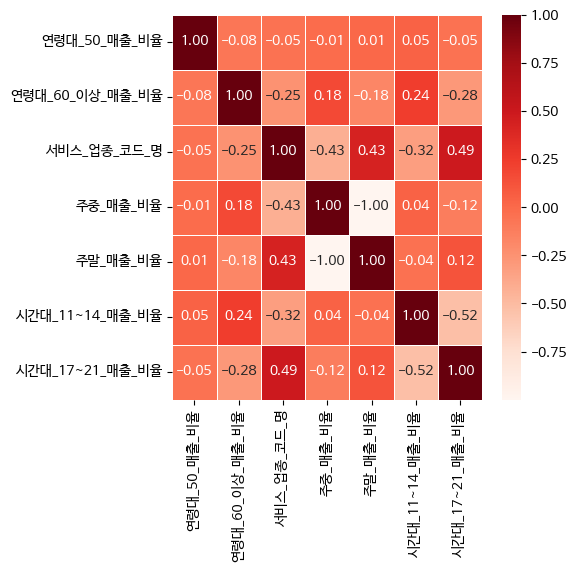

In [ ]:
df_gu_corr = df_gu.corr()

plt.figure(figsize=(5,5))
sns.heatmap(data = df_gu_corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')
plt.show()

# 스케일링

In [ ]:
df_gu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 22041 to 155948
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   연령대_50_매출_비율     1520 non-null   int64
 1   연령대_60_이상_매출_비율  1520 non-null   int64
 2   서비스_업종_코드_명      1520 non-null   int64
 3   주중_매출_비율         1520 non-null   int64
 4   주말_매출_비율         1520 non-null   int64
 5   시간대_11~14_매출_비율  1520 non-null   int64
 6   시간대_17~21_매출_비율  1520 non-null   int64
dtypes: int64(7)
memory usage: 95.0 KB


In [ ]:
df_gu['서비스_업종_코드_명'].unique() # array([4, 6, 5, 2, 3, 7, 1, 0])

########## 자치구는 스케일링 제외하고싶음

array([5, 1, 3, 4, 0, 2])

In [ ]:
# NaN값 찾기
df_gu[df_gu.isnull().any(axis=1)]    # 없음

,연령대_50_매출_비율,연령대_60_이상_매출_비율,서비스_업종_코드_명,주중_매출_비율,주말_매출_비율,시간대_11~14_매출_비율,시간대_17~21_매출_비율


In [ ]:
from sklearn.preprocessing import StandardScaler

# '자치구' 열 따로 추출
gu_column = df_gu['서비스_업종_코드_명']

# StandardScaler 적용
scaler = StandardScaler()

# '자치구' 열을 제외한 데이터프레임
df_gu_features = df_gu.drop(columns=['서비스_업종_코드_명'])

# 스케일링 적용
df_gu_scaled_data = scaler.fit_transform(df_gu_features)

# 데이터프레임 형태로 변환
df_gu_scaled_data = pd.DataFrame(df_gu_scaled_data, columns=df_gu_features.columns)

# '자치구' 열을 추가할 때, 인덱스를 재설정하여 정확한 값으로 추가
df_gu_scaled_data['서비스_업종_코드_명'] = gu_column.values  # '자치구' 열을 스케일링된 데이터프레임에 추가

# 인덱스를 리셋
# 스케일링 전의 '자치구' 열과 스케일링 후에 추가한 '자치구' 열의 인덱스가 동일하게 설정
df_gu_scaled_data.reset_index(drop=True, inplace=True)  # 데이터프레임의 인덱스를 재설정

df_gu_scaled_data

##########################에러날경우 다시 runtime


,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_비율,주말_매출_비율,시간대_11~14_매출_비율,시간대_17~21_매출_비율,서비스_업종_코드_명
0,0.825374,-0.649642,-0.781076,0.773827,0.369373,-0.051578,5
1,0.240460,0.591251,-0.286806,0.279588,-0.165147,-0.673793,1
2,0.606031,0.650341,0.278073,-0.285255,-0.632853,1.317294,3
3,0.898489,-0.236011,-1.134125,1.126854,-0.231962,-0.424907,5
4,-1.660514,-1.122363,1.478442,-1.485549,-1.969153,2.748388,3
...,...,...,...,...,...,...,...
1515,1.848975,-1.122363,1.478442,-1.485549,-1.969153,-1.482672,3
1516,0.386688,0.886702,-1.345955,1.338671,0.703448,-0.487129,5
1517,0.459803,0.473071,0.348683,-0.285255,0.102113,-0.549350,1
1518,0.971603,-0.590552,1.478442,-1.485549,-1.367818,-0.549350,4


In [ ]:
# NaN값 찾기
df_gu_scaled_data[df_gu_scaled_data.isnull().any(axis=1)]    # 없음

,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_비율,주말_매출_비율,시간대_11~14_매출_비율,시간대_17~21_매출_비율,서비스_업종_코드_명


In [ ]:
df_gu_scaled_data.head()

,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_비율,주말_매출_비율,시간대_11~14_매출_비율,시간대_17~21_매출_비율,서비스_업종_코드_명
0,0.825374,-0.649642,-0.781076,0.773827,0.369373,-0.051578,5
1,0.240460,0.591251,-0.286806,0.279588,-0.165147,-0.673793,1
2,0.606031,0.650341,0.278073,-0.285255,-0.632853,1.317294,3
3,0.898489,-0.236011,-1.134125,1.126854,-0.231962,-0.424907,5
4,-1.660514,-1.122363,1.478442,-1.485549,-1.969153,2.748388,3


In [ ]:
df_gu_scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   연령대_50_매출_비율     1520 non-null   float64
 1   연령대_60_이상_매출_비율  1520 non-null   float64
 2   주중_매출_비율         1520 non-null   float64
 3   주말_매출_비율         1520 non-null   float64
 4   시간대_11~14_매출_비율  1520 non-null   float64
 5   시간대_17~21_매출_비율  1520 non-null   float64
 6   서비스_업종_코드_명      1520 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 83.2 KB


# 자치구 분포도

In [ ]:
df_gu_scaled_data.columns

Index(['연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_비율', '주말_매출_비율',
       '시간대_11~14_매출_비율', '시간대_17~21_매출_비율', '서비스_업종_코드_명'],
      dtype='object')

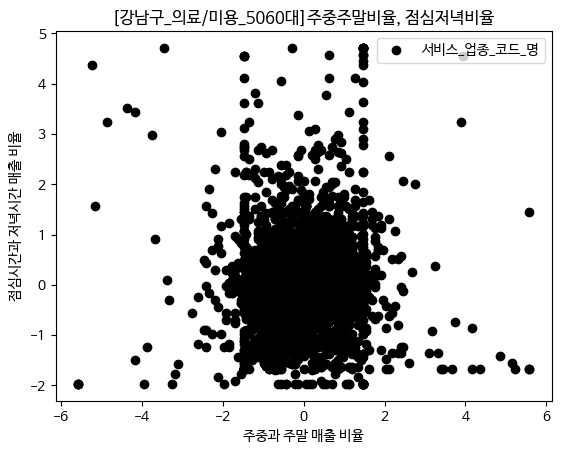

In [ ]:
# 자치구를 기준으로 데이터 포인트 (분포도) 파악하기

X = df_gu_scaled_data[['주중_매출_비율','주말_매출_비율']]
Y = df_gu_scaled_data[['시간대_11~14_매출_비율','시간대_17~21_매출_비율']]


plt.scatter(X, Y, c='black', label='서비스_업종_코드_명')
plt.xlabel('주중과 주말 매출 비율')
plt.ylabel('점심시간과 저녁시간 매출 비율')
plt.legend()
plt.title('[강남구_의료/미용_5060대]주중주말비율, 점심저녁비율')
plt.show()

In [ ]:
df_cleaned = df_gu_scaled_data

In [ ]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # 이상치 경계 설정
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # 이상치 식별
# outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# # 이상치 제거
# df_cleaned = df_gu_scaled_data[~outliers]

# k값 정하기

<Axes: >

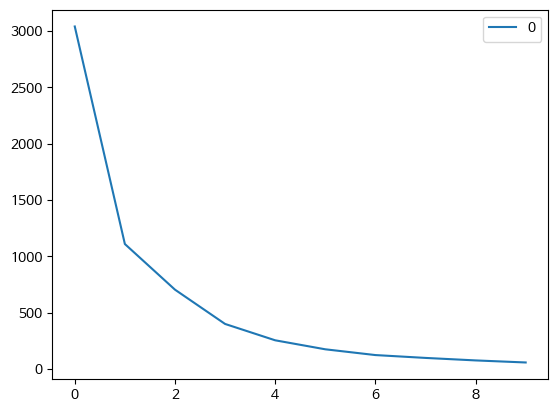

In [ ]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

pd.DataFrame(inertia).plot()

# k-means
- n_clusters : 군집 중심점(centroid)의 개수를 지정(군집의 개수를 지정)
- max_iter : centroid가 움직이는 과정의 최대 횟수

In [ ]:
# k-Means 모델 생성
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)

# 저차원 데이터에 k-Means 모델을 적용하여 클러스터링
cluster_labels = kmeans.fit_predict(df_cleaned)
X = df_cleaned

############################## 학습
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [ ]:
############################## 클러스터 번호 확인
cluster_labels = kmeans.fit_predict(X)
cluster_labels

array([2, 1, 3, ..., 1, 3, 2], dtype=int32)

In [ ]:
df_cleaned['cluster_id'] = kmeans.labels_
df_cleaned['cluster_id'].value_counts()

1    655
2    419
3    358
0     88
Name: cluster_id, dtype: int64

In [ ]:
# 해당 인덱스의 cluster_id 찾기

df_cleaned.tail(10)

,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_비율,주말_매출_비율,시간대_11~14_매출_비율,시간대_17~21_매출_비율,서비스_업종_코드_명,cluster_id
1510,-0.417570,-0.295101,-0.922296,0.915038,-0.699668,1.006187,5,2
1511,0.532917,-0.354191,-0.569246,0.632616,-0.031517,0.632858,5,2
1512,-0.856256,-0.945092,0.631123,-0.638283,-0.566038,1.566180,3,3
1513,1.190946,-0.117830,-0.851686,0.844432,0.302558,0.321750,5,2
1514,0.094231,0.354891,0.419293,-0.426466,-0.432408,0.508415,4,3
1515,1.848975,-1.122363,1.478442,-1.485549,-1.969153,-1.482672,3,3
1516,0.386688,0.886702,-1.345955,1.338671,0.703448,-0.487129,5,2
1517,0.459803,0.473071,0.348683,-0.285255,0.102113,-0.549350,1,1
1518,0.971603,-0.590552,1.478442,-1.485549,-1.367818,-0.549350,4,3
1519,-0.271341,-0.176921,-0.004367,0.067772,-0.699668,1.628401,5,2


In [ ]:
# # 해당 인덱스의 cluster_id 찾기

# row_index = 8113
# cluster_id = df_cleaned.loc[row_index, 'cluster_id']
# print(f'Row {row_index} belongs to cluster {cluster_id}')

In [ ]:
# fit_predict : 훈련과 동시에 예측
kmeans.fit_predict(X)

array([3, 0, 1, ..., 0, 1, 3], dtype=int32)

In [ ]:
# 타겟과 클러스터 내의 데이터 포인트 개수를 각각 확인
X.groupby(['서비스_업종_코드_명', 'cluster_id'])['시간대_17~21_매출_비율'].count().to_frame()

시간대_17~21_매출_비율
서비스_업종_코드_명 cluster_id                 
0           0                         7
            1                       226
            3                         1
1           0                        11
            1                       237
2           0                        25
            1                       164
            3                        12
3           0                        41
            1                        22
            2                        18
            3                       175
4           0                         3
            1                         6
            2                        50
            3                       126
5           0                         1
            2                       351
            3                        44

# PCA 차원축소

In [ ]:
# PCA를 이용해 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X)

X['pca_1'] = pca_transformed[:, 0]
X['pca_2'] = pca_transformed[:, 1]

X.head()

,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_비율,주말_매출_비율,시간대_11~14_매출_비율,시간대_17~21_매출_비율,서비스_업종_코드_명,cluster_id,pca_1,pca_2
0,0.825374,-0.649642,-0.781076,0.773827,0.369373,-0.051578,5,2,-2.286600,0.877982
1,0.240460,0.591251,-0.286806,0.279588,-0.165147,-0.673793,1,1,1.691895,0.825776
2,0.606031,0.650341,0.278073,-0.285255,-0.632853,1.317294,3,3,-0.822630,-1.328377
3,0.898489,-0.236011,-1.134125,1.126854,-0.231962,-0.424907,5,2,-2.409290,1.232618
4,-1.660514,-1.122363,1.478442,-1.485549,-1.969153,2.748388,3,3,-1.314517,-3.817567


# 시각화

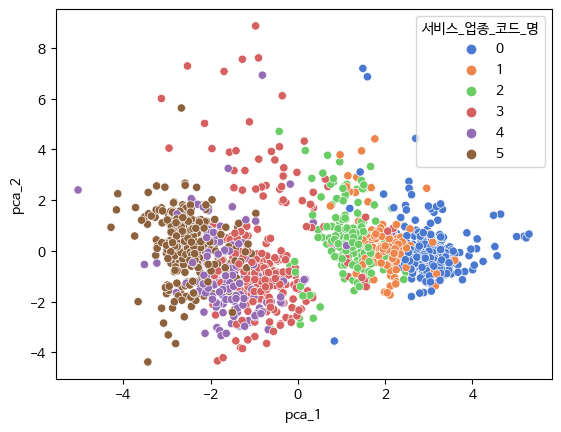

In [ ]:
import seaborn as sns

sns.scatterplot(
    x='pca_1',
    y='pca_2',
    hue='서비스_업종_코드_명',
    palette='muted',
    data= X
)

plt.show()

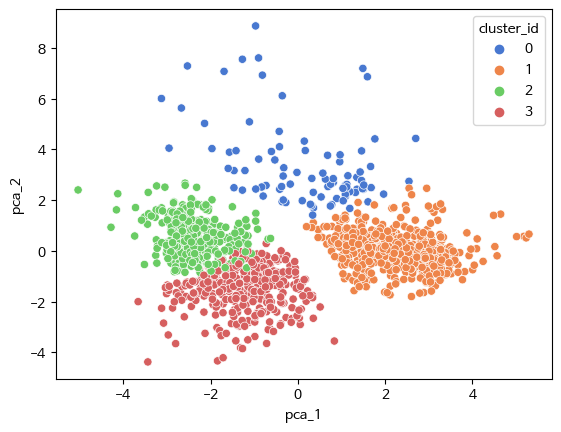

In [ ]:
import seaborn as sns

sns.scatterplot(
    x='pca_1',
    y='pca_2',
    hue='cluster_id',
    palette='muted',
    data= X
)

plt.show()

In [ ]:
X['cluster'] = cluster_labels
X.head()

,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_비율,주말_매출_비율,시간대_11~14_매출_비율,시간대_17~21_매출_비율,서비스_업종_코드_명,cluster_id,pca_1,pca_2,cluster
0,0.825374,-0.649642,-0.781076,0.773827,0.369373,-0.051578,5,2,-2.286600,0.877982,2
1,0.240460,0.591251,-0.286806,0.279588,-0.165147,-0.673793,1,1,1.691895,0.825776,1
2,0.606031,0.650341,0.278073,-0.285255,-0.632853,1.317294,3,3,-0.822630,-1.328377,3
3,0.898489,-0.236011,-1.134125,1.126854,-0.231962,-0.424907,5,2,-2.409290,1.232618,2
4,-1.660514,-1.122363,1.478442,-1.485549,-1.969153,2.748388,3,3,-1.314517,-3.817567,3


In [ ]:
centers = kmeans.cluster_centers_
centers

array([[ 0.09277981,  0.38412003,  0.55684747, -0.55743687,  0.46495407,
        -0.62154599,  1.        ,  1.        ],
       [-0.20394493, -0.44414662,  0.48438023, -0.48366078, -0.65151611,
         0.71176441,  3.55586592,  3.        ],
       [ 0.04687277, -0.06612653, -2.01835425,  2.01824838,  0.5933551 ,
        -0.75156987,  2.28409091,  0.        ],
       [ 0.01937161, -0.20710023, -0.86044879,  0.86077768, -0.29479093,
         0.5213344 ,  4.7947494 ,  2.        ]])

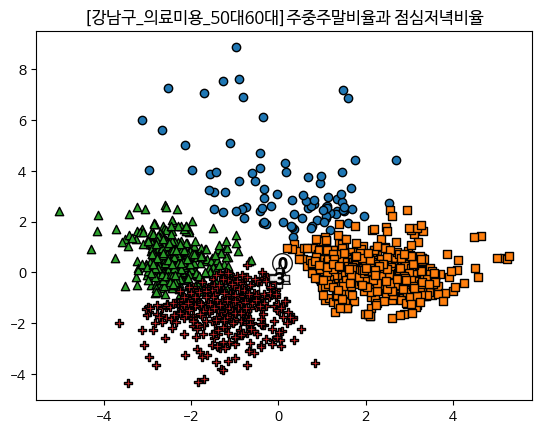

In [ ]:
# 클러스터 번호 가져오기
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label의 종류 별로 반복문을 돌려가면서 Scatter를 찍기
for label in unique_labels:
  # 각 레이블에 대한 클러스터 정보
  label_cluster = X[X['cluster_id'] == label]

  plt.scatter(
      x=label_cluster['pca_1'],
      y=label_cluster['pca_2'],
      edgecolor='k',
      marker=markers[label]
  )

  # 각 군집의 centroid 구하기
  center_x_y = centers[label]

  plt.scatter(
      x=center_x_y[0],
      y=center_x_y[1],
      s=200,
      color='white', alpha=0.9, edgecolor='k', marker=markers[label]
  )

  plt.scatter(
      x=center_x_y[0],
      y=center_x_y[1],
      s=70,
      color='k', edgecolor='k', marker='$%d$' % label
  )

plt.title('[강남구_의료미용_50대60대]주중주말비율과 점심저녁비율')
plt.show()

In [ ]:
# label에 따라 DataFrame을 그룹화
grouped = X.groupby('cluster_id')

# 각 그룹에서 자치구 변수의 분포를 확인
for label, group in grouped:
    print(f"Label: {label}")
    print(group['서비스_업종_코드_명'].value_counts())
    print()

Label: 0
3    41
2    25
1    11
0     7
4     3
5     1
Name: 서비스_업종_코드_명, dtype: int64

Label: 1
1    237
0    226
2    164
3     22
4      6
Name: 서비스_업종_코드_명, dtype: int64

Label: 2
5    351
4     50
3     18
Name: 서비스_업종_코드_명, dtype: int64

Label: 3
3    175
4    126
5     44
2     12
0      1
Name: 서비스_업종_코드_명, dtype: int64



In [ ]:
X[X['cluster_id']==2]

,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_비율,주말_매출_비율,시간대_11~14_매출_비율,시간대_17~21_매출_비율,서비스_업종_코드_명,cluster_id,pca_1,pca_2,cluster
0,0.825374,-0.649642,-0.781076,0.773827,0.369373,-0.051578,5,2,-2.286600,0.877982,2
3,0.898489,-0.236011,-1.134125,1.126854,-0.231962,-0.424907,5,2,-2.409290,1.232618,2
5,1.117832,0.295801,-0.498636,0.491405,-0.231962,0.508415,5,2,-2.264298,0.287801,2
9,1.629632,1.123063,-0.428026,0.420799,-1.033743,0.881744,5,2,-2.351570,-0.058854,2
11,1.117832,0.473071,-0.498636,0.491405,-0.699668,0.881744,5,2,-2.444162,0.046105,2
...,...,...,...,...,...,...,...,...,...,...,...
1510,-0.417570,-0.295101,-0.922296,0.915038,-0.699668,1.006187,5,2,-2.872893,0.327932,2
1511,0.532917,-0.354191,-0.569246,0.632616,-0.031517,0.632858,5,2,-2.442223,0.350205,2
1513,1.190946,-0.117830,-0.851686,0.844432,0.302558,0.321750,5,2,-2.340589,0.893001,2
1516,0.386688,0.886702,-1.345955,1.338671,0.703448,-0.487129,5,2,-2.107736,1.813859,2


In [ ]:
service_mapping_back = {        # 의료/미용
    0: '치과의원' ,
    1: '일반의원' ,
    2: '한의원' ,
    3: '피부관리실' ,
    4: '네일숍' ,
    5: '미용실'
}
# service_mapping_back = {       # 생활/잡화
#     0:'가방',
#     1:'일반의류' ,
#     2:'슈퍼마켓' ,
#     3:'반찬가게' ,
#     4:'편의점' ,
#     5:'세탁소' ,
# }
# service_mapping_back = {        # 음식점
#     0:'분식전문점' ,
#     1:'패스트푸드점' ,
#     2:'양식음식점'  ,
#     3:'일식음식점'  ,
#     4:'중식음식점'  ,
#     5:'한식음식점'  ,
#     6:'치킨전문점'  ,
#     7:'호프-간이주점'
# }
# service_mapping_back = {        # 카페/음료
#     0:'커피-음료',
#     1:'제과점'
# }
# service_mapping_back = {        # 교육
#     0:'외국어학원',
#     1:'일반교습학원' ,
#     2:'예술학원' ,
# }
# service_mapping_back = {       # 레저/오락
#     0:'스포츠클럽',
#     1:'스포츠강습' ,
#     2:'골프연습장' ,
#     3:'당구장' ,
#     4:'PC방' ,
#     5:'노래방' ,
# }
X['서비스_업종_코드_명'] = X['서비스_업종_코드_명'].map(service_mapping_back)
X.shape

(1520, 11)

In [ ]:
# 각 그룹에서 자치구 변수의 분포를 확인
for id, group in grouped:
    print(f"cluster_id : {id} 인 업종")
    print(group['서비스_업종_코드_명'].value_counts())
    print()

cluster_id : 0 인 업종
피부관리실    41
한의원      25
일반의원     11
치과의원      7
네일숍       3
미용실       1
Name: 서비스_업종_코드_명, dtype: int64

cluster_id : 1 인 업종
일반의원     237
치과의원     226
한의원      164
피부관리실     22
네일숍        6
Name: 서비스_업종_코드_명, dtype: int64

cluster_id : 2 인 업종
미용실      351
네일숍       50
피부관리실     18
Name: 서비스_업종_코드_명, dtype: int64

cluster_id : 3 인 업종
피부관리실    175
네일숍      126
미용실       44
한의원       12
치과의원       1
Name: 서비스_업종_코드_명, dtype: int64

